In [6]:
img_path = '/content/b.jpeg'

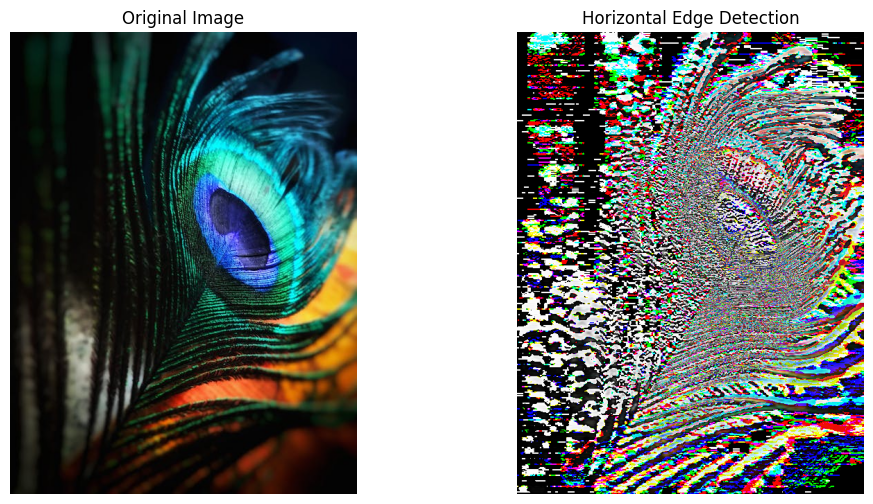

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.ndimage import convolve

def horizontal_edge_detection(image):
    # Define a horizontal edge detection kernel
    kernel = np.array([[-1, -1, -1],
                       [0, 0, 0],
                       [1, 1, 1]])

    # Apply the kernel separately to each channel
    edge_detected_image = np.zeros_like(image)
    for i in range(image.shape[-1]):
        edge_detected_image[..., i] = convolve(image[..., i], kernel)

    # Clip values to ensure they are within the valid pixel intensity range (0-255)
    edge_detected_image = np.clip(edge_detected_image, 0, 255).astype(np.uint8)

    return edge_detected_image

# Load an example image
original_img = np.array(Image.open(img_path))

edge_detected_img = horizontal_edge_detection(original_img)

# Plotting the images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(original_img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edge_detected_img, cmap='gray')  # Assuming grayscale image
plt.title('Horizontal Edge Detection')
plt.axis('off')

plt.show()
